In [1]:
import sys
sys.path.append("/home/liujunhui/workspace/proj/semantic_uncertainty/semantic_uncertainty")

import argparse
from uncertainty.utils import utils
from uncertainty.uncertainty_measures.semantic_entropy import predictive_entropy

from tqdm.notebook import tqdm

## 图1.a

In [2]:
# 定义参数
args = argparse.Namespace(
    dataset="trivia_qa",
    model_name="Llama-2-7b-chat-8bit",
    model_max_new_tokens=512,
    debug=False,
    entity=None,
    random_seed=10,
    metric='squad',
    compute_accuracy_at_all_temps=True,
    experiment_lot='Unnamed Experiment',
    recompute_accuracy=False,
    train_wandb_runid=None,
    num_eval_samples=10000000000000000000,
    compute_predictive_entropy=True,
    compute_p_ik=True,
    compute_p_ik_answerable=False,
    compute_context_entails_response=False,
    analyze_run=True,
    assign_new_wandb_id=False,
    restore_entity_eval=None,
    restore_entity_train=None,
    condition_on_question=True,
    strict_entailment=True,
    use_all_generations=True,
    use_num_generations=-1,
    entailment_model='deberta',
    entailment_cache_id=None,
    entailment_cache_only=False,
    compute_p_true_in_compute_stage=False,
    reuse_entailment_model=False,
    use_mc_options=False
)

In [3]:
# Initialize model.
model = utils.init_model(args)
# Temperature for first generation is always `0.1`.
temperature = 0.1

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## case study

In [ ]:
text_1="This will reduce the pollution caused by the carbones from the cars ."
text_2="This will reduce the pollution caused by the car bones from the cars."

ori_dic=model.get_token_log_likelihoods_dic(text_1)
cor_dic=model.get_token_log_likelihoods_dic(text_2)
print(model.get_token_log_likelihoods_dic(text_1))
print(model.get_token_log_likelihoods_dic(text_2))

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


[('<s>', -11.237125396728516), ('▁This', -11.858711242675781), ('▁will', -10.11039924621582), ('▁reduce', -12.407003402709961), ('▁the', -8.879886627197266), ('▁poll', -12.396705627441406), ('ution', -13.708147048950195), ('▁caused', -11.314926147460938), ('▁by', -10.547585487365723), ('▁the', -9.66524887084961), ('▁car', -11.1733980178833), ('b', -18.31064224243164), ('ones', -13.203455924987793), ('▁from', -10.53235912322998), ('▁the', -8.116357803344727), ('▁cars', -9.48948860168457), ('▁.', -6.343552589416504)]
[('<s>', -11.227346420288086), ('▁This', -11.81181812286377), ('▁will', -10.044952392578125), ('▁reduce', -12.417708396911621), ('▁the', -8.851263999938965), ('▁poll', -12.475783348083496), ('ution', -13.632890701293945), ('▁caused', -11.289347648620605), ('▁by', -10.46395492553711), ('▁the', -9.693716049194336), ('▁car', -11.415257453918457), ('▁b', -9.925092697143555), ('ones', -13.010881423950195), ('▁from', -9.179254531860352), ('▁the', -8.306880950927734), ('▁cars', -8.

## 可视化

In [16]:
ori_dic=[('<s>', -11.237125396728516), ('▁This', -11.858711242675781), ('▁will', -10.11039924621582), ('▁reduce', -12.407003402709961), ('▁the', -8.879886627197266), ('▁poll', -12.396705627441406), ('ution', -13.708147048950195), ('▁caused', -11.314926147460938), ('▁by', -10.547585487365723), ('▁the', -9.66524887084961), ('▁car', -11.1733980178833), ('b', -18.31064224243164), ('ones', -13.203455924987793), ('▁from', -10.53235912322998), ('▁the', -8.116357803344727), ('▁cars', -9.48948860168457), ('▁.', -6.343552589416504)]
cor_dic=[('<s>', -11.227346420288086), ('▁This', -11.81181812286377), ('▁will', -10.044952392578125), ('▁reduce', -12.417708396911621), ('▁the', -8.851263999938965), ('▁poll', -12.475783348083496), ('ution', -13.632890701293945), ('▁caused', -11.289347648620605), ('▁by', -10.46395492553711), ('▁the', -9.693716049194336), ('▁car', -11.415257453918457), ('▁b', -9.925092697143555), ('ones', -13.010881423950195), ('▁from', -9.179254531860352), ('▁the', -8.306880950927734), ('▁cars', -8.226369857788086), ('.', -8.616849899291992)]

In [20]:
data = []
text = []

# 处理 ori_dic
temp_1 = []
temp_2 = []
for item in ori_dic:
    temp_1.append(item[1])
    temp_2.append(item[0])

data.append(temp_1)
text.append(temp_2)

# 处理 cor_dic
temp_1 = []  # 重新定义 temp_1 为新的空列表
temp_2 = []  # 重新定义 temp_2 为新的空列表
for item in cor_dic:
    temp_1.append(item[1])
    temp_2.append(item[0])

data.append(temp_1)
text.append(temp_2)

In [21]:
data[0]==data[1]

False

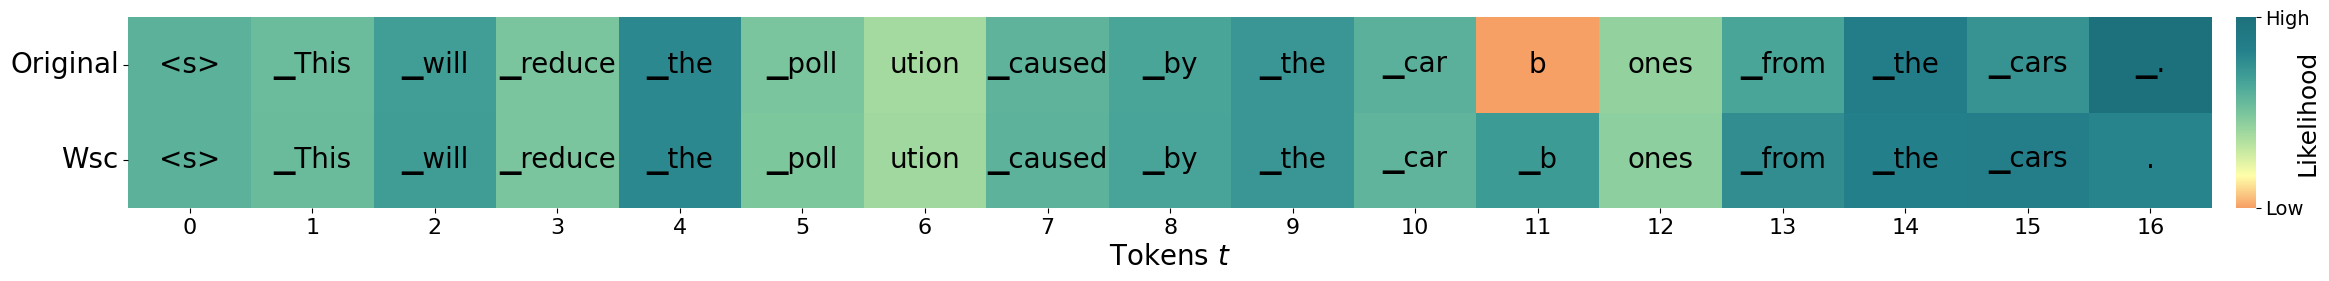

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298","#237f8b","#1D717C"]
newcmp = LinearSegmentedColormap.from_list('chaos', clist)
# 将列表 data 转换为 NumPy 数组
data_array = np.array(data)

# 创建画布
fig, ax = plt.subplots(figsize=(32, 4 * 0.618))
# ax.set_aspect(0.5)
# 使用 seaborn 绘制热力图
cax = sns.heatmap(
    data_array,
    ax=ax,
    cmap=newcmp,
    annot=False,       # 显示每个格子的值
    cbar_kws={"pad": 0.01, "shrink": 1, "aspect": 10}  # 颜色条的大小
)

# 设置颜色条
cbar = cax.collections[0].colorbar
vmin, vmax = data_array.min(), data_array.max()
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['Low', 'High'])
cbar.ax.tick_params(labelsize=14)
cbar.set_label("Likelihood", labelpad=-10, fontsize=18)

# 在格子中添加文本
for i in range(data_array.shape[0]):
    tokens = text[0] if i == 0 else text[1]
    for j in range(data_array.shape[1]):
        ax.text(j + 0.5, i + 0.5, tokens[j], ha="center", va="center", color="black", fontsize=20)

# 设置坐标轴标签
ax.set_xlabel(r'Tokens $t$', fontsize=20)

ax.tick_params(axis='x', labelsize=16)

# 设置 y 轴刻度和标签
row_labels = ['Original', 'Wsc']
ax.set_yticks(np.arange(len(row_labels)) + 0.5)  # 设置y轴的刻度位置
ax.set_yticklabels(row_labels, fontsize=20, rotation=0)  # y轴标签并旋转为水平


plt.savefig('./plot_1/'+'SHAP_3_300dpi.jpg', bbox_inches='tight', dpi=300)
plt.show()

## token_log_likelihoods

In [ ]:
# original文本文件路径
file_path_1 = "/home/liujunhui/workspace/proj/WSC/dataset/jfleg/jfleg/sources.txt"
file_path_2 = "/home/liujunhui/workspace/proj/WSC/dataset/jfleg/jfleg/corrections.txt"
# 打开文件并读取内容到列表
with open(file_path_1, "r") as file:
    jfleg_lst = [line.strip() for line in file.readlines()]

with open(file_path_2, "r") as file:
    jfleg_lst.extend([line.strip() for line in file.readlines()])

file_path_3 = "/home/liujunhui/workspace/proj/WSC/dataset/jfleg/jfleg_corrected/sources.txt"
file_path_4 = "/home/liujunhui/workspace/proj/WSC/dataset/jfleg/jfleg_corrected/corrections.txt"

# 打开文件并读取内容到列表
with open(file_path_3, "r") as file:
    jfleg_lst_wsc = [line.strip() for line in file.readlines()]

with open(file_path_4, "r") as file:
    jfleg_lst_wsc.extend([line.strip() for line in file.readlines()])

In [ ]:
lst = [[],[]]
for i in tqdm(range(len(jfleg_lst))):

    ori_text = jfleg_lst[i]
    cor_text = jfleg_lst_wsc[i]

    lst[0].append(model.get_token_log_likelihoods(ori_text))
    lst[1].append(model.get_token_log_likelihoods(cor_text))

In [ ]:
import json
ans={
    "ori_text":text_1,
    "cor_text":text_2,
    "case_study_token_likelihoods":case_lst,
    "all_token_likelihoods":lst
}

# Save lst as JSON
with open("shap_3_data.json", 'w') as json_file:
    json.dump(ans, json_file)